In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('dataset w7.csv')
dataset

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# 1. Carry out descriptive analytics on the dataset.

In [4]:
dataset.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [5]:
dataset.groupby(by ='Gender')['Total Marks'].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_2336\4106054632.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(by ='Gender')['Total Marks','Test preparation'].describe()


Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [13]:
dataset.shape

(28, 3)

In [14]:
dataset.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

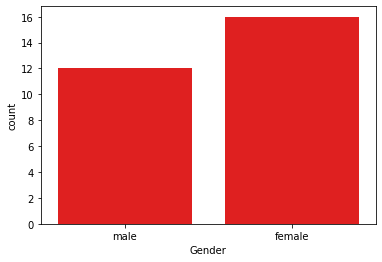

In [11]:
import seaborn as sns
sns.countplot(data=dataset,x='Gender',color='red')

<AxesSubplot:xlabel='Total Marks', ylabel='Count'>

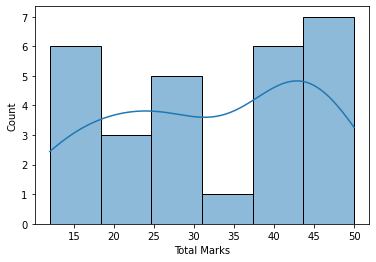

In [20]:
sns.histplot(dataset['Total Marks'],kde=True)

In [26]:
d= dataset[['Gender','Total Marks']].groupby('Gender').sum()
d

,Total Marks
Gender,
female,540
male,365


1.The above dataset has 28 samples
2.There are no null values
3.The mean of Total marks is 32.32
4.The stadard deviation, minimum value, 25 percentalie, median, 75 percentalie and maximum values of given dataset are 12.45,    12, 22,33 43.25, 50 respectivly
5. Since the values of mean and mode are nearer values, there is no outliers in the given dataset
6. There are 16 female students and 12 male students samples
7. the mean of score of female students is larger than mean score of male students
8.The maximum and minimun score is 50 and 12 respectivly

# 2. Check whether female and male students scored the same marks.

In [ ]:
H0 : Female and male students score same marks
H1 : Female and male students doesnt score same marks

In [34]:
from scipy.stats import ttest_ind
alpha = 0.05
female = dataset[dataset['Gender']=='female']['Total Marks']
female

1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [35]:
male = dataset[dataset['Gender']=='male']['Total Marks']
male

0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [36]:
_,p = ttest_ind(male,female)
print("p value :", p)
if p < alpha:
    print("Rejecting the  H0")
else:
    print("Failing to reject the H0.")

p value : 0.4937822317960763
Failing to reject the H0.


 Based on the test carried on the provided data we are failing to accept the null hypothesis

# 3. Whether test preparation helps the students

In [41]:
alpha = 0.05
tnone = dataset[dataset['Test preparation']=='none']['Total Marks']
tnone

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [42]:
tcom = dataset[dataset['Test preparation']=='none']['Total Marks']
tcom

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [45]:
_,p =ttest_ind(tnone,tcom)
print("p value",p)
if p<alpha:
    print("Rejecting H0")
else:
    print("Failing to reject H0")

p value 1.0
Failing to reject H0


Based on the test carried on the provided data we are failing to reject the null hypothesis